In [ ]:
# Projectile Motion with Air Drag  
# **Computational Physics Portfolio Project**  
# Physics student freelance demo: Realistic trajectory including quadratic drag  
# Compares no-drag (ideal) vs with-drag cases using SciPy integration  
# Common applications: ballistics, sports, engineering

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Constants
g = 9.81          # m/s²
rho = 1.225       # air density kg/m³ (sea level)
Cd = 0.47         # drag coefficient (sphere ~0.47)
A = np.pi*(0.1)**2  # cross-sectional area m² (10 cm radius ball)
m = 0.5           # mass kg (e.g., baseball ~0.145, adjust as needed)

# Quadratic drag force: F_d = -0.5 * rho * Cd * A * v² * direction
def projectile_deriv(t, state):
    x, y, vx, vy = state
    
    v = np.sqrt(vx**2 + vy**2)
    if v > 1e-10:
        drag = 0.5 * rho * Cd * A * v**2
        ax = - (drag / m) * (vx / v)
        ay = -g - (drag / m) * (vy / v)
    else:
        ax, ay = 0, -g
    
    return [vx, vy, ax, ay]

In [3]:
# Initial conditions: launch angle 45°, speed 50 m/s
theta = 45 * np.pi / 180
v0 = 50
y0 = [0, 0, v0 * np.cos(theta), v0 * np.sin(theta)]

t_span = (0, 20)  # max sim time
t_eval = np.linspace(0, 20, 1000)

# With drag
sol_drag = solve_ivp(projectile_deriv, t_span, y0, t_eval=t_eval, method='RK45')

# Without drag (set drag=0 by making rho=0 or Cd=0)
def no_drag(t, state):
    x, y, vx, vy = state
    return [vx, vy, 0, -g]

sol_no = solve_ivp(no_drag, t_span, y0, t_eval=t_eval, method='RK45')

print("✅ Simulations complete!")

✅ Simulations complete!


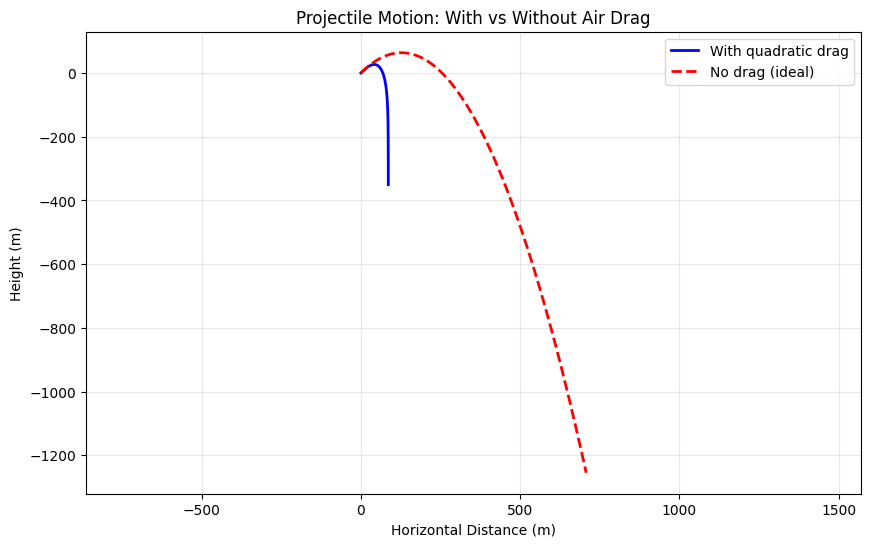

Range with drag: 86.0 m


In [4]:
plt.figure(figsize=(10, 6))

# With drag
plt.plot(sol_drag.y[0], sol_drag.y[1], 'b-', lw=2, label='With quadratic drag')

# No drag
plt.plot(sol_no.y[0], sol_no.y[1], 'r--', lw=2, label='No drag (ideal)')

plt.title('Projectile Motion: With vs Without Air Drag')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')  # optional, but nice for trajectories
plt.show()

# Bonus: Find range & max height
range_drag = sol_drag.y[0][-1] if sol_drag.y[1][-1] < 0 else sol_drag.y[0][np.argmax(sol_drag.y[1] < 0)]
print(f"Range with drag: {range_drag:.1f} m")

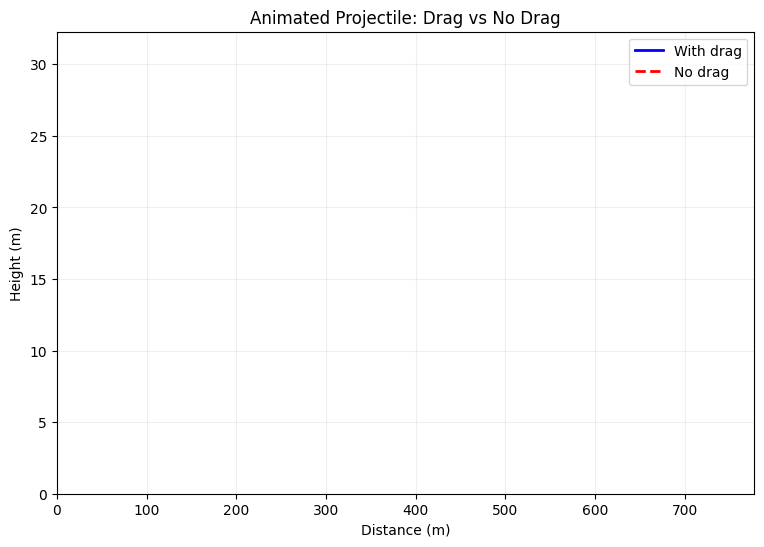

In [5]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlim(0, max(sol_drag.y[0].max(), sol_no.y[0].max()) * 1.1)
ax.set_ylim(0, sol_drag.y[1].max() * 1.2)
ax.grid(True, alpha=0.2)

# Lines & points
line_drag, = ax.plot([], [], 'b-', lw=2, label='With drag')
point_drag, = ax.plot([], [], 'bo', ms=8)
line_no, = ax.plot([], [], 'r--', lw=2, label='No drag')
point_no, = ax.plot([], [], 'ro', ms=6)

time_text = ax.text(0.05, 0.92, '', transform=ax.transAxes, fontsize=12)

trail_drag_x, trail_drag_y = [], []
trail_no_x, trail_no_y = [], []

def init():
    line_drag.set_data([], [])
    point_drag.set_data([], [])
    line_no.set_data([], [])
    point_no.set_data([], [])
    time_text.set_text('')
    return line_drag, point_drag, line_no, point_no, time_text

def animate(i):
    # Drag
    trail_drag_x.append(sol_drag.y[0][i])
    trail_drag_y.append(sol_drag.y[1][i])
    line_drag.set_data(trail_drag_x, trail_drag_y)
    point_drag.set_data([sol_drag.y[0][i]], [sol_drag.y[1][i]])
    
    # No drag
    trail_no_x.append(sol_no.y[0][i])
    trail_no_y.append(sol_no.y[1][i])
    line_no.set_data(trail_no_x, trail_no_y)
    point_no.set_data([sol_no.y[0][i]], [sol_no.y[1][i]])
    
    time_text.set_text(f'Time = {sol_drag.t[i]:.1f} s')
    return line_drag, point_drag, line_no, point_no, time_text

ani = FuncAnimation(fig, animate, frames=len(sol_drag.t), init_func=init, interval=20, blit=True)

plt.title('Animated Projectile: Drag vs No Drag')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.show()

In [6]:
ani.save('projectile_drag.gif', writer='pillow', fps=30)
print("✅ GIF saved!")

✅ GIF saved!
